In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [18]:
import pickle

In [20]:
# Load the model from the file
with open(r"C:\Users\raulo\Desktop\saved_random_forest_model_new5000.pkl", 'rb') as file:
    loaded_model = pickle.load(file)

In [21]:
df = pd.read_csv(r"C:\Users\raulo\Desktop\LD10(T17)NR3_re-encDLC_dlcrnetms5_LD_YelFeb10shuffle1_75000_el_filtered.csv", header = 2)
df = df.drop(0)
df.index = df.index -1    #Set the index rigth
df = df.drop(columns='bodyparts')

C:\Users\raulo\AppData\Local\Temp\ipykernel_6444\169926456.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\raulo\Desktop\LD10(T17)NR3_re-encDLC_dlcrnetms5_LD_YelFeb10shuffle1_75000_el_filtered.csv", header = 2)


In [22]:
df_label = pd.read_csv(r"C:\Users\raulo\Desktop\LD10(T17)NR3_re-enc_labels.csv")
df_label = df_label.drop(columns='Unnamed: 0')
#print(file_path)

In [23]:
df_label

,background,Int_Cleaner,Int_Client,Dance,TS,Pousing,Jolt,Run
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
42655,1,0,0,0,0,0,0,0
42656,1,0,0,0,0,0,0,0
42657,1,0,0,0,0,0,0,0
42658,1,0,0,0,0,0,0,0


In [24]:
# Convert DataFrame into a single-column DataFrame
single_column_df = pd.DataFrame(df_label.idxmax(axis=1), columns=['Interaction'])

In [25]:
single_column_df["Interaction"] = single_column_df["Interaction"].replace("Pousing", "background")

interaction_counts2 = single_column_df["Interaction"].value_counts()
print(interaction_counts2)

background    42644
Int_Client       16
Name: Interaction, dtype: int64


In [26]:
labeled_df = pd.concat([single_column_df, df], axis=1)

In [27]:
merged_df = labeled_df

In [28]:
merged_df

,Interaction,Client_Mouth,Client_Mouth.1,Client_Mouth.2,Client_Spine_head,Client_Spine_head.1,Client_Spine_head.2,Client_Spine_tail,Client_Spine_tail.1,Client_Spine_tail.2,...,Cleaner_Mouth.2,Cleaner_Spine1,Cleaner_Spine1.1,Cleaner_Spine1.2,Cleaner_Spine2,Cleaner_Spine2.1,Cleaner_Spine2.2,Cleaner_Tail,Cleaner_Tail.1,Cleaner_Tail.2
0,background,1152.19,783.12,1.0,1178.409,744.695,1.0,1203.086,718.926,1.0,...,1.0,1379.753,827.799,1.0,1403.892,837.772,0.9980000257492065,1437.221,844.219,1.0
1,background,1152.19,783.12,1.0,1178.409,744.772,1.0,1203.086,719.149,1.0,...,1.0,1379.753,828.41,1.0,1404.198,837.772,0.9990000128746033,1437.221,844.832,1.0
2,background,1152.19,783.12,1.0,1178.409,744.781,1.0,1203.086,719.867,1.0,...,1.0,1379.753,828.41,1.0,1404.741,837.772,0.9990000128746033,1437.221,845.12,1.0
3,background,1152.034,783.021,1.0,1177.736,745.406,1.0,1198.016,721.243,1.0,...,1.0,1377.454,827.799,1.0,1404.741,837.374,1.0,1430.338,845.12,1.0
4,background,1151.648,782.945,1.0,1177.128,745.457,1.0,1197.955,721.462,1.0,...,1.0,1372.108,827.404,1.0,1404.198,836.862,1.0,1426.14,845.12,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42655,background,1501.839,868.307,1.0,1557.222,835.185,1.0,1635.728,818.624,1.0,...,1.0,997.205,545.509,1.0,1060.033,549.375,1.0,1115.96,556.382,1.0
42656,background,1500.834,868.307,1.0,1557.047,836.329,1.0,1627.312,819.655,1.0,...,1.0,995.461,546.018,1.0,1053.976,549.931,1.0,1109.303,557.4,1.0
42657,background,1499.117,868.307,1.0,1556.429,836.701,1.0,1627.111,820.419,1.0,...,1.0,987.886,547.82,0.999,1053.468,550.842,1.0,1105.988,557.991,1.0
42658,background,1497.878,868.21,1.0,1555.563,836.701,1.0,1625.532,820.419,1.0,...,1.0,987.351,547.82,0.999,1044.282,550.842,1.0,1100.508,557.991,1.0


In [29]:
X = merged_df.iloc[:, 1:43]  # Select columns 1 to 42 as features
y = merged_df.iloc[:, 0]     # Select column 0 as the target variable

In [30]:
imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)

In [31]:
# Load necessary libraries
import pandas as pd
from sklearn.metrics import accuracy_score

# Prepare the dataset if needed (e.g., perform preprocessing steps)

# Make predictions using the random forest model
y_pred = loaded_model.predict(X_imputed)

# If you have the ground truth labels, compare them with the predicted labels
y_true = y  # Replace "target_variable" with the actual column name

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9932255039849976


In [34]:
cm = confusion_matrix(y_true, y_pred)

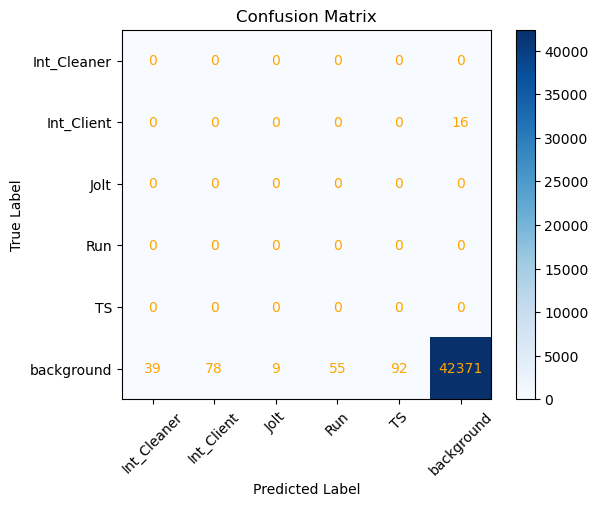

In [38]:
# Create the confusion matrix
cm = np.array(cm)

class_labels = np.sort(loaded_model.classes_)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)

# Add labels to each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()